In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


folder_path = "/content/drive/MyDrive/p1"
documents = {}
#looping through each file in the folder adding it as in `documents`
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), "r") as file:
            documents[filename] = file.read()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#using sklearn to vectorise the documnets content
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents.values())
#converting the X into dataframe for soft convenience
import pandas as pd
td_matrix = pd.DataFrame(X.toarray(), index=documents.keys(), columns=vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics import jaccard_score
import numpy as np

# Create a function to compute Jaccard distance for all document pairs
def jaccard_distance_matrix(td_matrix):
    n_docs = len(td_matrix)
    jaccard_matrix = np.zeros((n_docs, n_docs))

    for i in range(n_docs):
        for j in range(i, n_docs):
            doc1 = (td_matrix[i] > 0).astype(int)  # Binary conversion
            doc2 = (td_matrix[j] > 0).astype(int)
            distance = 1 - jaccard_score(doc1, doc2, average='binary')
            jaccard_matrix[i, j] = distance
            jaccard_matrix[j, i] = distance  # Symmetric matrix

    return jaccard_matrix

jaccard_matrix = jaccard_distance_matrix(X.toarray())


In [ ]:
jaccard_matrix

array([[0.        , 0.88067445, 0.86588542, 0.90373563, 0.91353997,
        0.90422535, 0.90254237, 0.89298246, 0.903177  ],
       [0.88067445, 0.        , 0.85031447, 0.9063772 , 0.91257669,
        0.91973684, 0.90080429, 0.92503987, 0.90753912],
       [0.86588542, 0.85031447, 0.        , 0.9       , 0.9086758 ,
        0.90633245, 0.88108108, 0.89822294, 0.90240453],
       [0.90373563, 0.9063772 , 0.9       , 0.        , 0.91637011,
        0.89417178, 0.89908257, 0.91902072, 0.91558442],
       [0.91353997, 0.91257669, 0.9086758 , 0.91637011, 0.        ,
        0.88571429, 0.91840278, 0.91590909, 0.92467043],
       [0.90422535, 0.91973684, 0.90633245, 0.89417178, 0.88571429,
        0.        , 0.9159292 , 0.91926606, 0.91587302],
       [0.90254237, 0.90080429, 0.88108108, 0.89908257, 0.91840278,
        0.9159292 , 0.        , 0.88212928, 0.86143573],
       [0.89298246, 0.92503987, 0.89822294, 0.91902072, 0.91590909,
        0.91926606, 0.88212928, 0.        , 0.89484536],


In [8]:
from sklearn.metrics import pairwise_distances

# Calculate the Euclidean distance matrix directly
euclidean_matrix = pairwise_distances(X.toarray(), metric='euclidean')


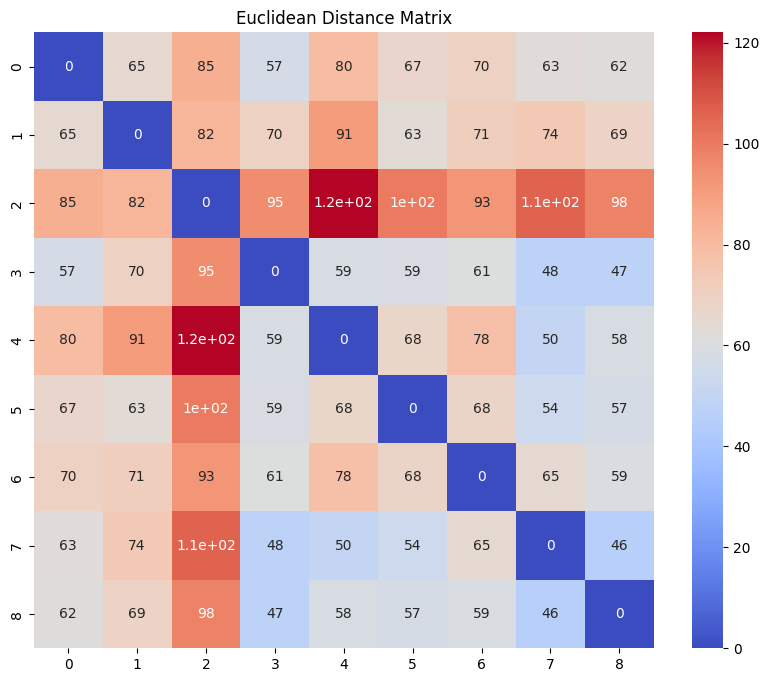

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(matrix, title, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.show()

plot_heatmap(euclidean_matrix, "Euclidean Distance Matrix", labels)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# First, compute the Cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X.toarray())

# Convert Cosine similarity to Cosine distance
cosine_distance_matrix = 1 - cosine_sim_matrix


In [ ]:
from scipy.special import rel_entr

# Function to compute KL divergence for two probability distributions
def kl_divergence(p, q):
    return np.sum(rel_entr(p, q))

# Normalize the term frequencies (convert to probability distribution)
td_matrix_normalized = X.toarray() / np.sum(X.toarray(), axis=1, keepdims=True)

# Create a K-L divergence matrix
n_docs = td_matrix_normalized.shape[0]
kl_matrix = np.zeros((n_docs, n_docs))

for i in range(n_docs):
    for j in range(i, n_docs):
        # Avoid divergence with zero probabilities by adding a small epsilon
        p = np.clip(td_matrix_normalized[i], 1e-10, 1)
        q = np.clip(td_matrix_normalized[j], 1e-10, 1)
        divergence = kl_divergence(p, q)
        kl_matrix[i, j] = divergence
        kl_matrix[j, i] = divergence  # Symmetric matrix



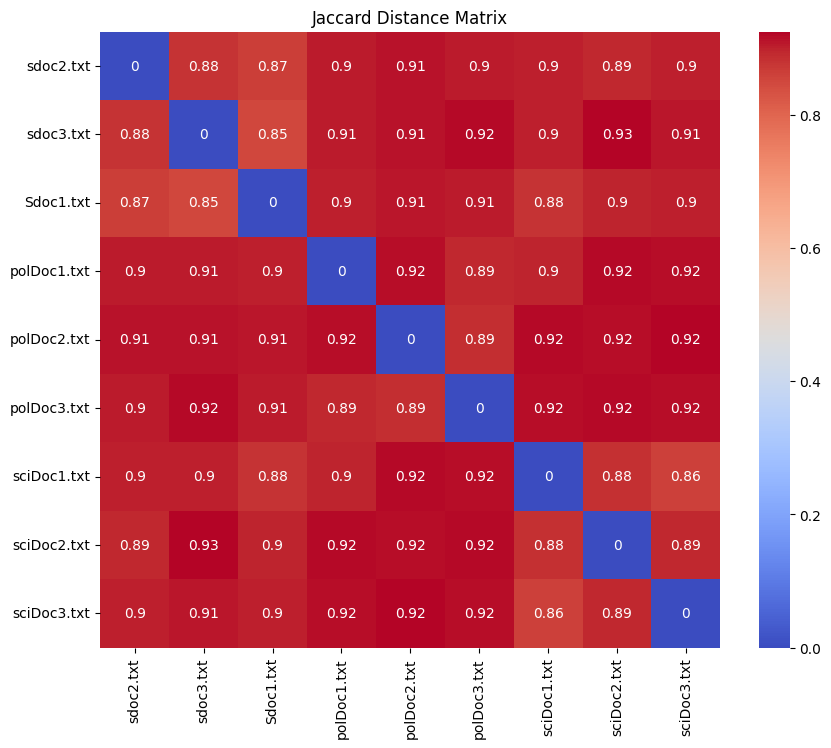

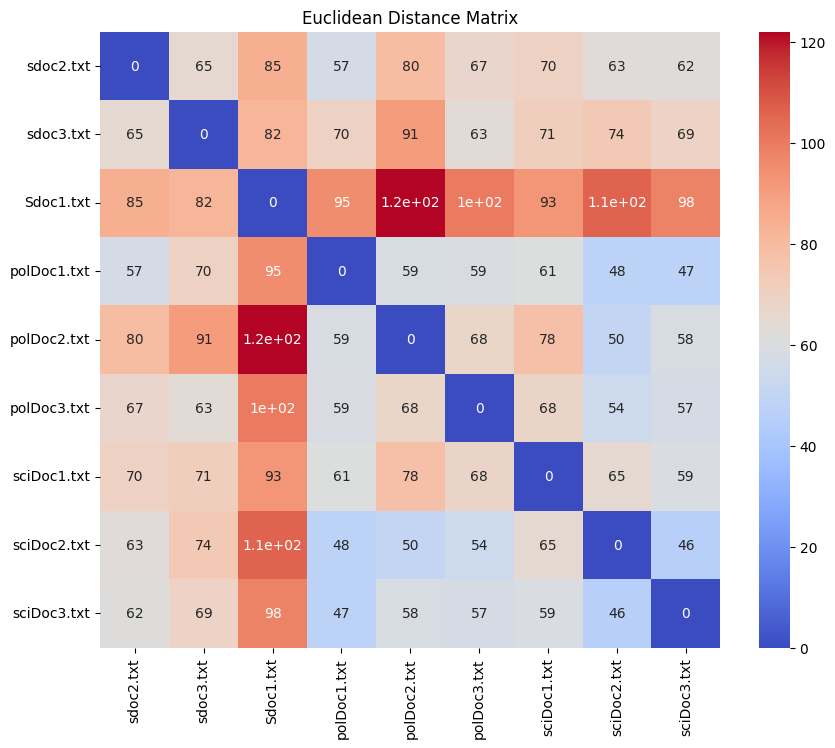

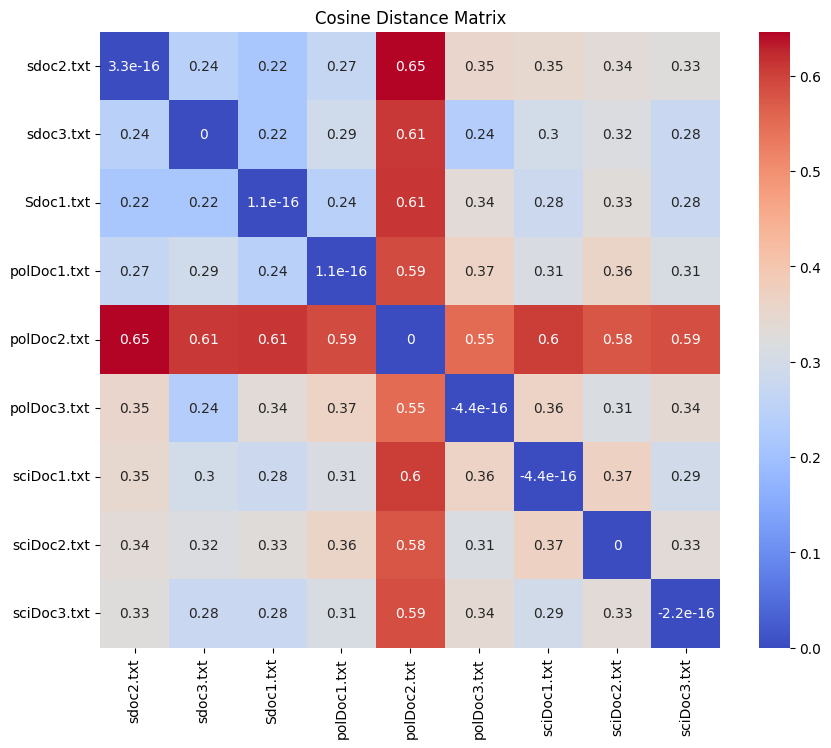

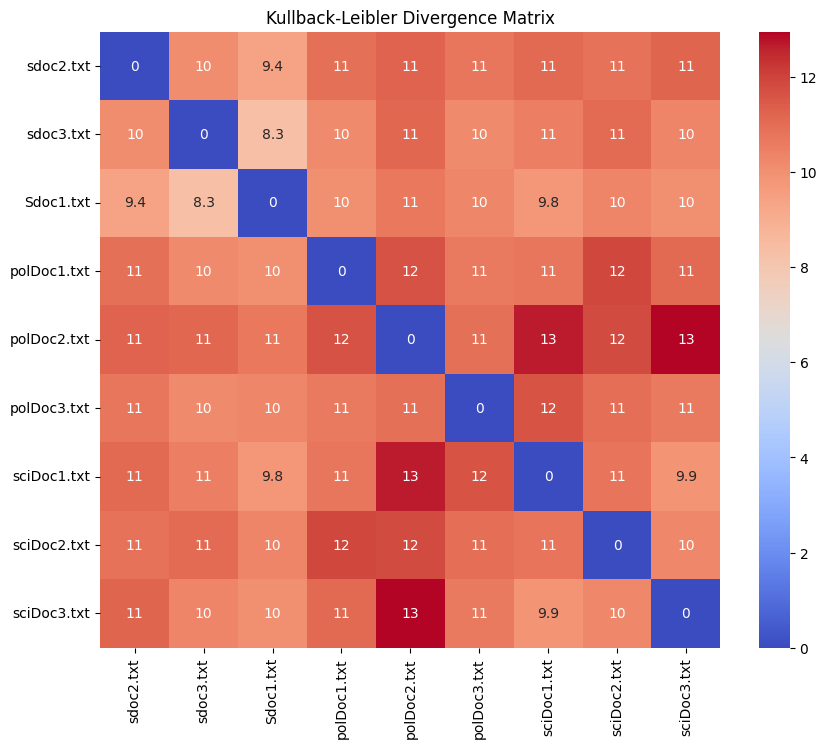

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize distance matrices using heatmaps
def plot_heatmap(matrix, title, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.show()

# Visualize Jaccard, Euclidean, Cosine, and K-L distance matrices
labels = list(documents.keys())

plot_heatmap(jaccard_matrix, "Jaccard Distance Matrix", labels)
plot_heatmap(euclidean_matrix, "Euclidean Distance Matrix", labels)
plot_heatmap(cosine_distance_matrix, "Cosine Distance Matrix", labels)
plot_heatmap(kl_matrix, "Kullback-Leibler Divergence Matrix", labels)


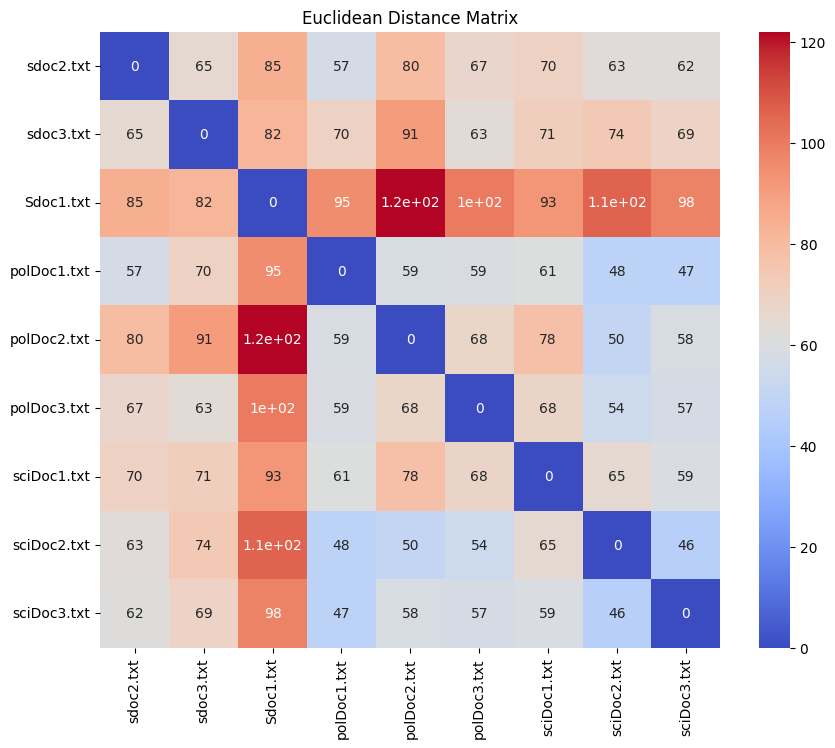

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Euclidean Distance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(euclidean_distances, annot=True, cmap='coolwarm', xticklabels=documents.keys(), yticklabels=documents.keys())
plt.title("Euclidean Distance Matrix")
plt.show()
